In [22]:
import kagglehub
import pandas as pd
import os
import shutil

# Get the current working directory (works in notebooks/interactive shells)
current_dir = os.getcwd()

# Specify the dataset identifier
dataset = "arhamrumi/amazon-product-reviews"

# Download the dataset to the current directory
temp_path = kagglehub.dataset_download(dataset)
dataset_name = os.path.basename(temp_path)

# Move the downloaded files to the current directory
target_path = os.path.join(current_dir, dataset_name)
if os.path.exists(target_path):
    shutil.rmtree(target_path)  # Remove if exists to avoid conflicts
shutil.move(temp_path, target_path)

# Find the CSV file within the downloaded dataset directory
csv_file_path = None
for filename in os.listdir(target_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(target_path, filename)
        break  # Stop after finding the first CSV file

if csv_file_path:
    print("Path to CSV file:", csv_file_path)
    # Load the dataset with proper delimiters and quotes handling
    df = pd.read_csv(csv_file_path, quotechar='"', sep=',', engine='python')
    print(df.head())
else:
    print("No CSV file found in the downloaded dataset")

100%|██████████| 115M/115M [00:28<00:00, 4.25MB/s] 

Extracting files...


Path to CSV file: c:\Users\Manikandan Rangarjan\Documents\Development\Web dev\sepm\models\1\Reviews.csv
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                              

In [42]:
# import pandas as pd
# import joblib
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score, classification_report

# def load_and_clean_data(file_path):
#     # Load data
#     df = pd.read_csv(file_path)
#     print("Original Data Shape:", df.shape)
    
#     # Remove duplicates and missing values
#     df = df.drop_duplicates().dropna()

#     # Convert Score to binary sentiment (1 for positive, 0 for negative)
#     df['Sentiment'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

#     # Keep only necessary columns
#     df = df[['Text', 'Sentiment']]
#     print("Cleaned Data Shape:", df.shape)
#     return df

# def train_model(data):
#     X = data['Text']
#     y = data['Sentiment']

#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Convert text to vectors
#     vectorizer = CountVectorizer()
#     X_train_vec = vectorizer.fit_transform(X_train)
#     X_test_vec = vectorizer.transform(X_test)

#     # Train model
#     model = MultinomialNB()
#     model.fit(X_train_vec, y_train)

#     # Predict and evaluate
#     y_pred = model.predict(X_test_vec)
#     print("Accuracy:", accuracy_score(y_test, y_pred))
#     print(classification_report(y_test, y_pred))

#     # Save the model and vectorizer
#     joblib.dump(model, 'sentiment_model1.pkl')
#     joblib.dump(vectorizer, 'vectorizer1.pkl')
#     print("Model and Vectorizer saved successfully.")


#     return y_test, y_pred

# # Load and clean data
# data = load_and_clean_data('./Reviews.csv')

# # Train model
# y_test, y_pred = train_model(data)

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

def load_and_clean_data(file_path):
    # Load data
    df = pd.read_csv(file_path)
    print("Original Data Shape:", df.shape)
    
    # Remove duplicates and missing values
    df = df.drop_duplicates().dropna(subset=['Text', 'Score'])

    # Convert Score to three-class sentiment
    # 1-2: Negative (0), 3: Neutral (1), 4-5: Positive (2)
    def map_sentiment(score):
        if score <= 2:
            return 0  # Negative
        elif score == 3:
            return 1  # Neutral
        else:
            return 2  # Positive

    df['Sentiment'] = df['Score'].apply(map_sentiment)

    # Keep only necessary columns
    df = df[['Text', 'Sentiment']]
    print("Cleaned Data Shape:", df.shape)
    return df

def train_model(data):
    X = data['Text']
    y = data['Sentiment']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text to vectors
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Train model
    model = MultinomialNB()
    model.fit(X_train_vec, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_vec)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

    # Save the model and vectorizer
    joblib.dump(model, 'sentiment_model1.pkl')
    joblib.dump(vectorizer, 'vectorizer1.pkl')
    print("Model and Vectorizer saved successfully.")

    return model, vectorizer, y_test, y_pred

# Load and clean data
data = load_and_clean_data('./Reviews.csv')

# Train model
model, vectorizer, y_test, y_pred = train_model(data)

# Example: Predict sentiment for a new review
new_review = ["This product is okay, nothing special."]
new_review_vec = vectorizer.transform(new_review)
prediction = model.predict(new_review_vec)
sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
print(f"Predicted sentiment for '{new_review[0]}': {sentiment_map[prediction[0]]}")


Original Data Shape: (568454, 10)
Cleaned Data Shape: (568454, 2)
Accuracy: 0.8354487162572235
              precision    recall  f1-score   support

    Negative       0.65      0.67      0.66     16181
     Neutral       0.35      0.37      0.36      8485
    Positive       0.92      0.91      0.92     89025

    accuracy                           0.84    113691
   macro avg       0.64      0.65      0.65    113691
weighted avg       0.84      0.84      0.84    113691

Model and Vectorizer saved successfully.
Predicted sentiment for 'This product is okay, nothing special.': Positive


Original Data Shape: (568454, 10)
Cleaned Data Shape: (568401, 2)
Accuracy: 0.8785549036338526
              precision    recall  f1-score   support

           0       0.72      0.73      0.72     24912
           1       0.92      0.92      0.92     88769

    accuracy                           0.88    113681
   macro avg       0.82      0.83      0.82    113681
weighted avg       0.88      0.88      0.88    113681



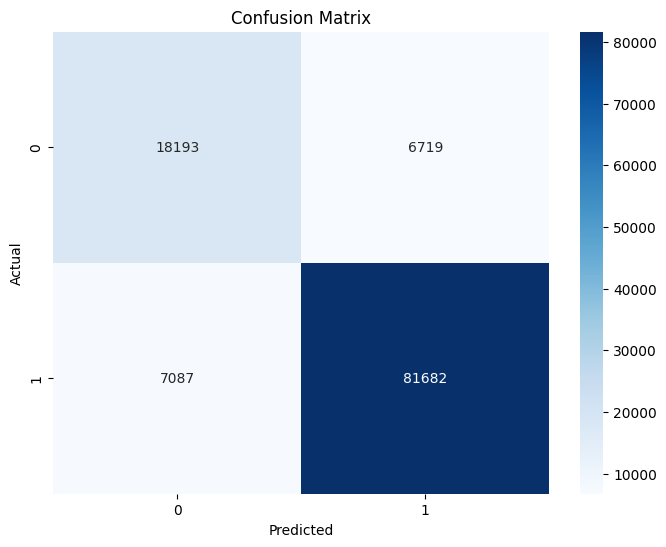

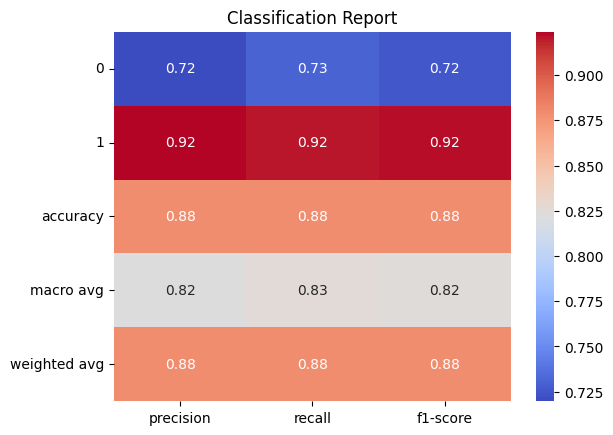

In [40]:
def visualize_results(y_test, y_pred):
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report Heatmap
    report = classification_report(y_test, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='coolwarm')
    plt.title('Classification Report')
    plt.show()
cleaned_data = load_and_clean_data('./Reviews.csv')
y_test, y_pred = train_model(cleaned_data)
visualize_results(y_test, y_pred)